In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import datetime

In [3]:
data = yf.download('AAPL', period='1mo', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Converting date to ordinal
data['Date'] = data.index
data['Date'] = data['Date'].map(lambda x: x.toordinal())

In [6]:
# Preparing the data
X = np.array(data['Date']).reshape(-1, 1)
y = data['Close'].values

In [7]:
# Creating and fitting the model
model = LinearRegression().fit(X, y)

In [8]:
# Predicting the next day's price
next_day = np.array([[X[-1, 0] + 1]])
prediction = model.predict(next_day)

In [9]:
model

LinearRegression()

In [10]:
prediction[0]

222.0202391644707

In [11]:
predictions = model.predict(X)

In [15]:
mse = mean_squared_error(y, predictions)
mse

29.27131159553113

In [16]:
r2 = r2_score(y, predictions)
r2

0.5735801910977838

In [19]:
mae = mean_absolute_error(y, predictions)
mae

4.686696570913773

In [20]:
evs = explained_variance_score(y, predictions)
evs

0.5735801910977838

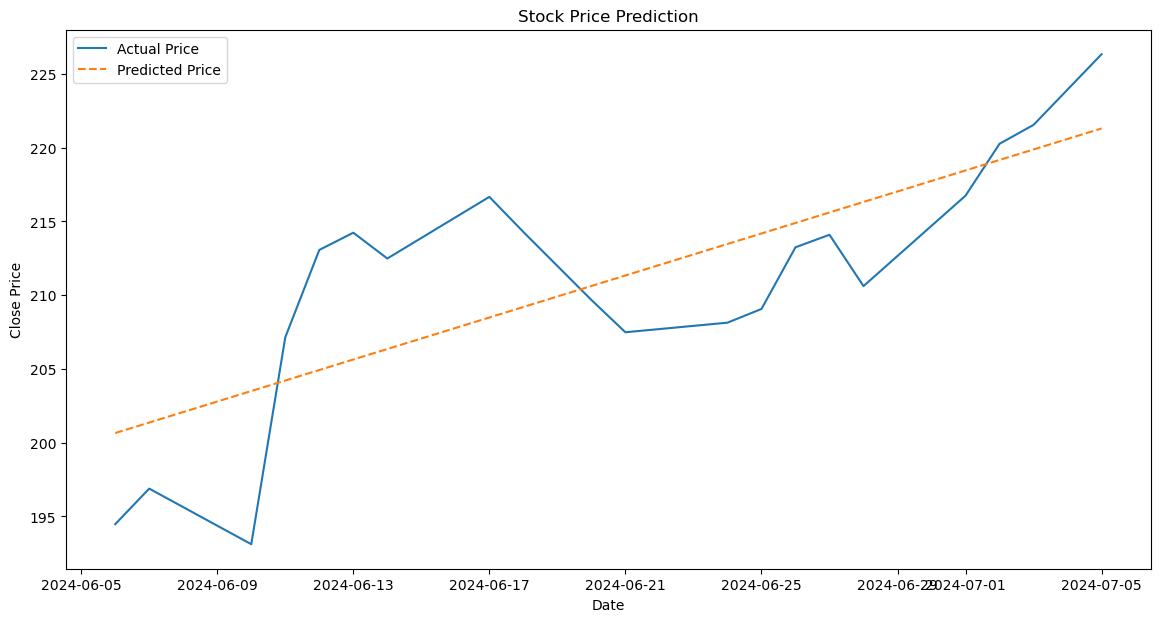

In [22]:
data['Prediction'] = model.predict(data['Date'].values.reshape(-1, 1))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Price')
plt.plot(data.index, data['Prediction'], label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()